## Intoducción

En este ejercicio compararemos varios modelos de "ensamblado" para un problema de clasificación.

**Debes generar en cada celda de código una celda de texto que explique lo que se hace e interpretar los resultados (métricas) cuando corresponda.
Finalmente, generar una CONCLUSION con tu análisis. Comparando y justificando en forma adecuada, cual fue el mejor modelo aplicado en este caso.**

Para ello utilizaremos el dataset de  Estabilidad de una Matriz Eléctrica.


https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

La estabilidad en una matriz energética del país es de suma importancia para el progreso economico y el bienestar de sus habitantes (solo tener presente la sensación de inseguridad, malestar, etc. que se puede generar con un corte no previsto puede afectar el mercado económico y el bienestar de una población)

El desafio es tratar de determinar si la red es estable (columna ```stabf```) basado en un conjunto de caracteristicas disponibles:


1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer. 
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4) 
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer. 
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real) 
5. stabf: the stability label of the system (categorical: stable/unstable) 


Estos datos fueron usados en el paper: "Towards Concise Models of Grid Stability"



## Antes de empezar modelar

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

X = df.drop(['stab','stabf'],axis=1)
Y = df['stabf']

## Bagging

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)
mo = DecisionTreeClassifier() 
model = BaggingClassifier(mo, n_estimators=10)

params = {"base_estimator__max_depth": [2,3],
          "max_samples": [0.1,0.2],
          "base_estimator__min_samples_split": [2,3,4]} 
grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.81225
{'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 4, 'max_samples': 0.2}


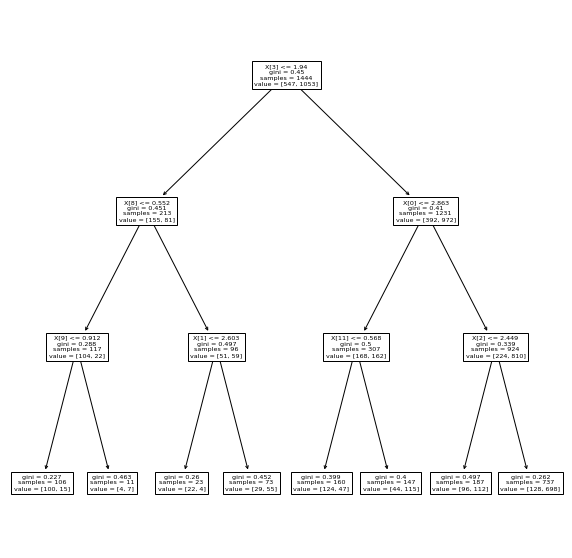

In [ ]:
# Visualizamos 1 sólo árbol dentro del "bosque" generado por Bagging
import matplotlib.pyplot as plt
from sklearn import tree

mo_ = grid.best_estimator_.estimators_[0]
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(mo_) 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 387  360]
 [  61 1192]]
              precision    recall  f1-score   support

      stable       0.86      0.52      0.65       747
    unstable       0.77      0.95      0.85      1253

    accuracy                           0.79      2000
   macro avg       0.82      0.73      0.75      2000
weighted avg       0.80      0.79      0.77      2000



**Usar otra función de scoring/loss para elegir el "mejor" modelo**



*   Funciones pre-definidas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

*   Funciones personalizadas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='accuracy')
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                        

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.80425
{'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 4, 'max_samples': 0.1}


In [ ]:
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

mean_fit_time                                                                      0.0525502
std_fit_time                                                                     0.000662491
mean_score_time                                                                   0.00392632
std_score_time                                                                   0.000131252
param_base_estimator__max_depth                                                            3
param_base_estimator__min_samples_split                                                    4
param_max_samples                                                                        0.1
params                                     {'base_estimator__max_depth': 3, 'base_estimat...
split0_test_score                                                                       0.79
split1_test_score                                                                     0.8025
split2_test_score                                                     

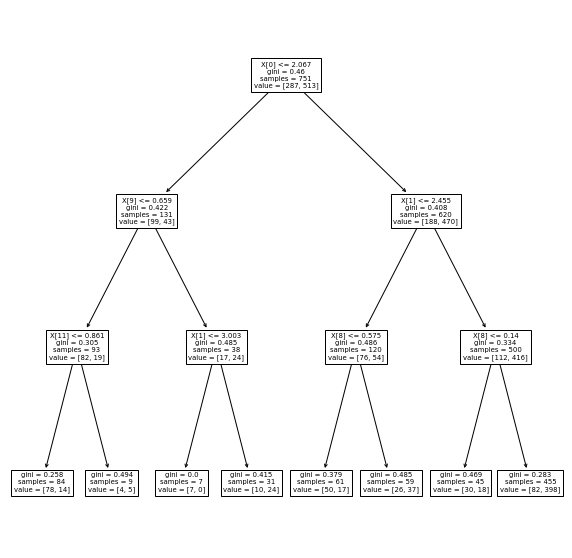

In [ ]:
# Visualizamos el árbol ganador!
import matplotlib.pyplot as plt
from sklearn import tree

mo_ = grid.best_estimator_.estimators_[0]
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(mo_) 

##RandomForest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

model = RandomForestClassifier()

params = {"n_estimators": [10],
          "max_depth": [2,3], 
          "min_samples_split": [2,3,4],
          "max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.77025
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_split': 4, 'n_estimators': 10}


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 319  409]
 [  47 1225]]
              precision    recall  f1-score   support

      stable       0.87      0.44      0.58       728
    unstable       0.75      0.96      0.84      1272

    accuracy                           0.77      2000
   macro avg       0.81      0.70      0.71      2000
weighted avg       0.79      0.77      0.75      2000



##AdaBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

mo = DecisionTreeClassifier() 
model = AdaBoostClassifier(mo)

params = {"n_estimators": [10],
          "base_estimator__max_depth": [2,3], 
          "base_estimator__min_samples_split": [2,3,4], 
          "base_estimator__max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [1]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 601  118]
 [  99 1182]]
              precision    recall  f1-score   support

      stable       0.86      0.84      0.85       719
    unstable       0.91      0.92      0.92      1281

    accuracy                           0.89      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.89      0.89      0.89      2000



##Gradient Boosting

**INVESTIGA Y EXPLICA como funciona este modelo**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

model = GradientBoostingClassifier()

params = {"n_estimators": [10],
          "max_depth": [2,3], 
          "min_samples_split": [2,3,4], 
          "max_leaf_nodes": [5,8]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
_=grid.fit(Xtrain, Ytrain)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
#pd.DataFrame(grid.cv_results_)

0.779375
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Yhat = grid.predict(Xtest)
print(confusion_matrix(Ytest, Yhat))
print(classification_report(Ytest, Yhat))

[[ 315  434]
 [   7 1244]]
              precision    recall  f1-score   support

      stable       0.98      0.42      0.59       749
    unstable       0.74      0.99      0.85      1251

    accuracy                           0.78      2000
   macro avg       0.86      0.71      0.72      2000
weighted avg       0.83      0.78      0.75      2000

